In [ ]:
import numpy as np
import pandas as pd

excel_file_path = 'tahmin_tt.xlsx' # Dosya yolunu güncelleyin
df_input_data = pd.read_excel(excel_file_path)
df_long = pd.melt(df_input_data, value_vars=df_input_data.columns, var_name="date", value_name="data")["data"]
df_final = pd.DataFrame(df_long)
df_final.columns = ["data"]
raw_input_data = df_final['data'].values # Tüm veriyi numpy array olarak al
raw_input_data

array([3236.33311767, 3054.37950067, 2874.02666367, 2794.49264767,
       2676.55510867, 2403.51516567, 2399.49555467, 2627.60728867,
       2937.63599267, 2982.20386067, 3077.32661567, 3162.61829367,
       3271.26956567, 3359.81135467, 3371.36700967, 3451.94690867,
       3323.22521267, 3316.86377867, 3336.78614067, 3437.28772967,
       3594.85686267, 3509.71706267, 3390.80589667, 3285.98130867,
       3082.82514667, 2913.79080167, 2796.01332667, 2687.12323167,
       2571.27961167, 2354.84960727, 2443.0093412 , 2699.64048923,
       2952.48403286, 3063.73131959, 3137.5567737 , 3117.29671532,
       3112.72311542, 3178.44520966, 3156.09417239, 3098.56184815,
       3090.14432711, 2986.43057416, 2939.56103122, 3061.63718216,
       3352.15361667, 3319.66193167, 3190.80618167, 3109.55903667,
       2831.47358667, 2675.46682667, 2563.04286167, 2551.04705667,
       2481.43002667, 2256.00090723, 2325.5040915 , 2603.17382499,
       2919.89564391, 3102.3233156 , 3162.44602968, 3206.72220

In [54]:
import numpy as np
import pandas as pd
import joblib
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError # MSE kaybını import edin

# Kaydedilen dosyaların yolları (masaüstünüzdeki yollara göre güncelleyin)
model_load_path = 'lstm_model.h5' # Model dosyasının yolu
scaler_load_path = 'scaler_y.pkl' # Scaler dosyasının yolu

# Modeli yükle
try:
    # custom_objects={} içine özel katmanları, fonksiyonları, metrikleri ekleyin
    custom_objects = {'mse': MeanSquaredError()} # MSE kaybını belirtiyoruz
    loaded_model = load_model(model_load_path, custom_objects=custom_objects)
    print(f"Model başarıyla yüklendi: {model_load_path}")
except Exception as e:
    print(f"Model yüklenirken bir hata oluştu: {e}")
    loaded_model = None # Hata durumunda loaded_model'ı None olarak ayarla

# Scaler'ı yükle
try:
    loaded_scaler_y = joblib.load(scaler_load_path)
    print(f"Scaler başarıyla yüklendi: {scaler_load_path}")
except Exception as e:
    print(f"Scaler yüklenirken bir hata oluştu: {e}")
    loaded_scaler_y = None # Hata durumunda loaded_scaler_y'yi None olarak ayarla


print("\nYüklenen modelin özeti:")
if loaded_model:
    loaded_model.summary()
else:
    print("Model yüklenemedi, özet gösterilemiyor.")


Model başarıyla yüklendi: lstm_model.h5
Scaler başarıyla yüklendi: scaler_y.pkl

Yüklenen modelin özeti:


C:\Users\ahmet.yildirir\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.6.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 72, 256)             │         133,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 72, 256)             │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 72, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 128)                 │         164,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 24)                  │           3,096 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 302,106 (1.15 MB)

 Trainable params: 301,336 (1.15 MB)

 Non-trainable params: 768 (3.00 KB)

 Optimizer params: 2 (12.00 B)

In [55]:
scaled_input_data = loaded_scaler_y.transform(raw_input_data.reshape(-1, 1)) # Scaler 2D input bekler

In [56]:
X_input_for_prediction = scaled_input_data[np.newaxis, ...] # veya scaled_input_data.reshape(1, window_size, 1)


In [57]:
scaled_prediction = loaded_model.predict(X_input_for_prediction) # Çıktı (1, 24) şeklinde olacak
scaled_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


array([[0.6208473 , 0.58121455, 0.5487509 , 0.51804364, 0.48464674,
        0.45240423, 0.45746776, 0.5092177 , 0.5748211 , 0.6170536 ,
        0.6353177 , 0.6467431 , 0.6564272 , 0.66764796, 0.6787472 ,
        0.6857236 , 0.68250906, 0.6713011 , 0.6728959 , 0.69618773,
        0.7134805 , 0.7078903 , 0.68545455, 0.65141904]], dtype=float32)

In [58]:
raw_prediction = loaded_scaler_y.inverse_transform(scaled_prediction) # Çıktı (1, 24) şeklinde olacak
final_prediction = raw_prediction.flatten() # İsterseniz 1D diziye çevirebilirsiniz (24)
final_prediction

array([3196.4485, 3023.3943, 2881.643 , 2747.5615, 2601.7356, 2460.9504,
       2483.06  , 2709.0234, 2995.4775, 3179.8838, 3259.6328, 3309.5215,
       3351.8064, 3400.8013, 3449.2656, 3479.7278, 3465.6917, 3416.7527,
       3423.7163, 3525.419 , 3600.9268, 3576.5173, 3478.553 , 3329.9385],
      dtype=float32)

In [59]:
df_result = pd.DataFrame()

df_result["Tahmin"] = final_prediction
df_result

,Tahmin
0,3196.448486
1,3023.394287
2,2881.643066
3,2747.561523
4,2601.735596
5,2460.950439
6,2483.060059
7,2709.023438
8,2995.477539
9,3179.883789


In [60]:
raw_predict_data = df_final['data'].values[-window_size:] # Son 72 saat, numpy array
raw_predict_data

array([3170.15158667, 3001.79782667, 2857.03186167, 2738.45705667,
       2637.86062667, 2291.9091929 , 2437.58614694, 2815.13080306,
       3108.77903376, 3279.23579448, 3325.88925712, 3376.68774587,
       3438.238386  , 3517.05905742, 3563.8592477 , 3514.56671869,
       3583.81672676, 3517.23307469, 3608.22387153, 3694.55716918,
       3849.15986667, 3758.78893667, 3605.91084667, 3452.20141667])

In [61]:
df_result["gerçek"]=raw_predict_data
df_result

,Tahmin,gerçek
0,3196.448486,3170.151587
1,3023.394287,3001.797827
2,2881.643066,2857.031862
3,2747.561523,2738.457057
4,2601.735596,2637.860627
5,2460.950439,2291.909193
6,2483.060059,2437.586147
7,2709.023438,2815.130803
8,2995.477539,3108.779034
9,3179.883789,3279.235794


In [62]:
df_result["Fark"] = df_result["Tahmin"]-df_result["gerçek"]
df_result

,Tahmin,gerçek,Fark
0,3196.448486,3170.151587,26.296900
1,3023.394287,3001.797827,21.596460
2,2881.643066,2857.031862,24.611205
3,2747.561523,2738.457057,9.104467
4,2601.735596,2637.860627,-36.125031
5,2460.950439,2291.909193,169.041247
6,2483.060059,2437.586147,45.473912
7,2709.023438,2815.130803,-106.107366
8,2995.477539,3108.779034,-113.301495
9,3179.883789,3279.235794,-99.352005


In [63]:
df_result.to_excel("Tahmin_Sonuçlar.xlsx")

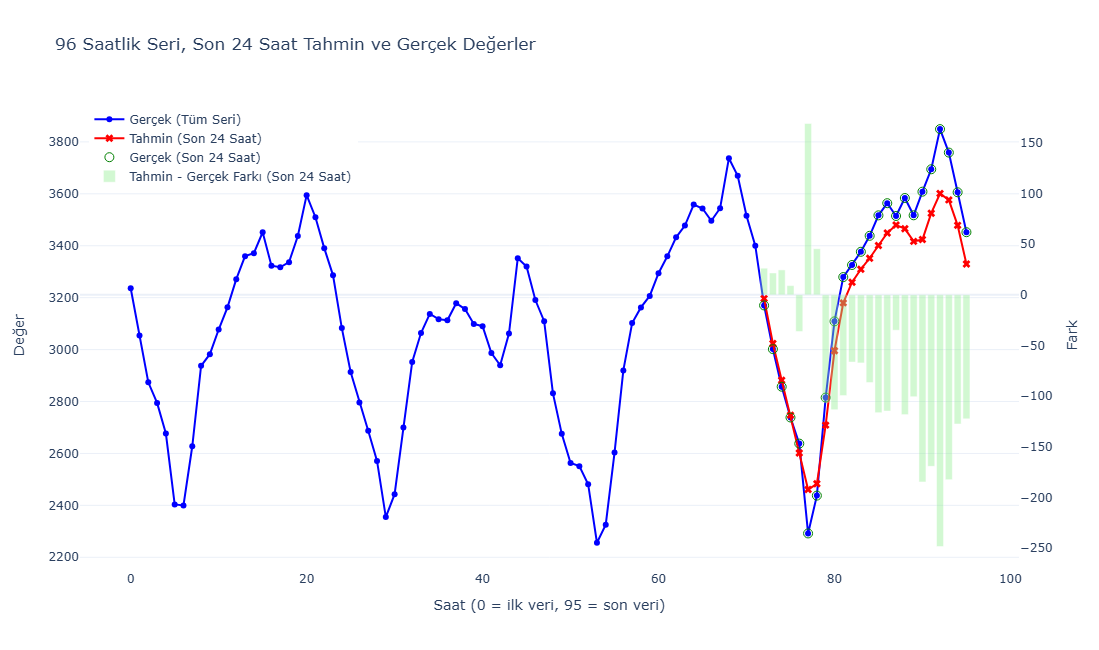

In [67]:
import plotly.graph_objs as go
import pandas as pd
import numpy as np

# df_final['data']: 96 veri
# df_result['gerçek']: son 24 saat (gerçek)
# df_result['Tahmin']: son 24 saat (tahmin)
# df_result['Fark']: tahmin - gerçek

# Tüm seriyi gösteren temel zaman dizisi (x ekseni)
time_index = np.arange(len(df_final['data']))

fig = go.Figure()

# 1. Tüm 96 seriyi (ham veri - mavi)
fig.add_trace(go.Scatter(
    x=time_index, y=df_final['data'],
    mode='lines+markers',
    name='Gerçek (Tüm Seri)',
    line=dict(color='blue'),
    marker=dict(size=6, color='blue')
))

# 2. Son 24 saat: Model tahmini (kırmızı çizgi)
fig.add_trace(go.Scatter(
    x=time_index[-24:], y=df_result['Tahmin'],
    mode='lines+markers',
    name='Tahmin (Son 24 Saat)',
    line=dict(color='red'),
    marker=dict(size=7, color='red', symbol='x')
))

# 3. Son 24 saat: Gerçek (yeşil noktalar)
fig.add_trace(go.Scatter(
    x=time_index[-24:], y=df_result['gerçek'],
    mode='markers',
    name='Gerçek (Son 24 Saat)',
    marker=dict(size=9, color='green', symbol='circle-open')
))

# 4. Dilerseniz: Farkı (tahmin-gerçek) çubuk grafik olarak göstermek için (opsiyonel)
fig.add_trace(go.Bar(
    x=time_index[-24:], y=df_result['Fark'],
    name='Tahmin - Gerçek Farkı (Son 24 Saat)',
    marker=dict(color='lightgreen'),
    opacity=0.4,
    yaxis='y2'
))

# İkincil y ekseni fark için
fig.update_layout(
    yaxis2=dict(
        overlaying='y',
        side='right',
        showgrid=False,
        title='Fark'
    ),
    title='96 Saatlik Seri, Son 24 Saat Tahmin ve Gerçek Değerler',
    xaxis_title='Saat (0 = ilk veri, 95 = son veri)',
    yaxis_title='Değer',
    legend=dict(x=0.01, y=0.99),
    width=1100,
    height=650,
    template='plotly_white'
)

fig.show()
